<a href="https://colab.research.google.com/github/veeralipi22/13-Random-forest-company-data/blob/main/Assignment_15_Company_Data_Random_Forest(N1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
com=pd.read_csv('Company_Data.csv')
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
# Checking for information of Data Frame
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
# Checking for null values
com.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# Checking the relation between Columns
com.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [ ]:
# Grouping by categorical coumns
com.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [ ]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
com['ShelveLoc']= label_encoder.fit_transform(com['ShelveLoc'])
com['Urban']= label_encoder.fit_transform(com['Urban'])
com['US']= label_encoder.fit_transform(com['US'])

In [ ]:
com.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


visualization

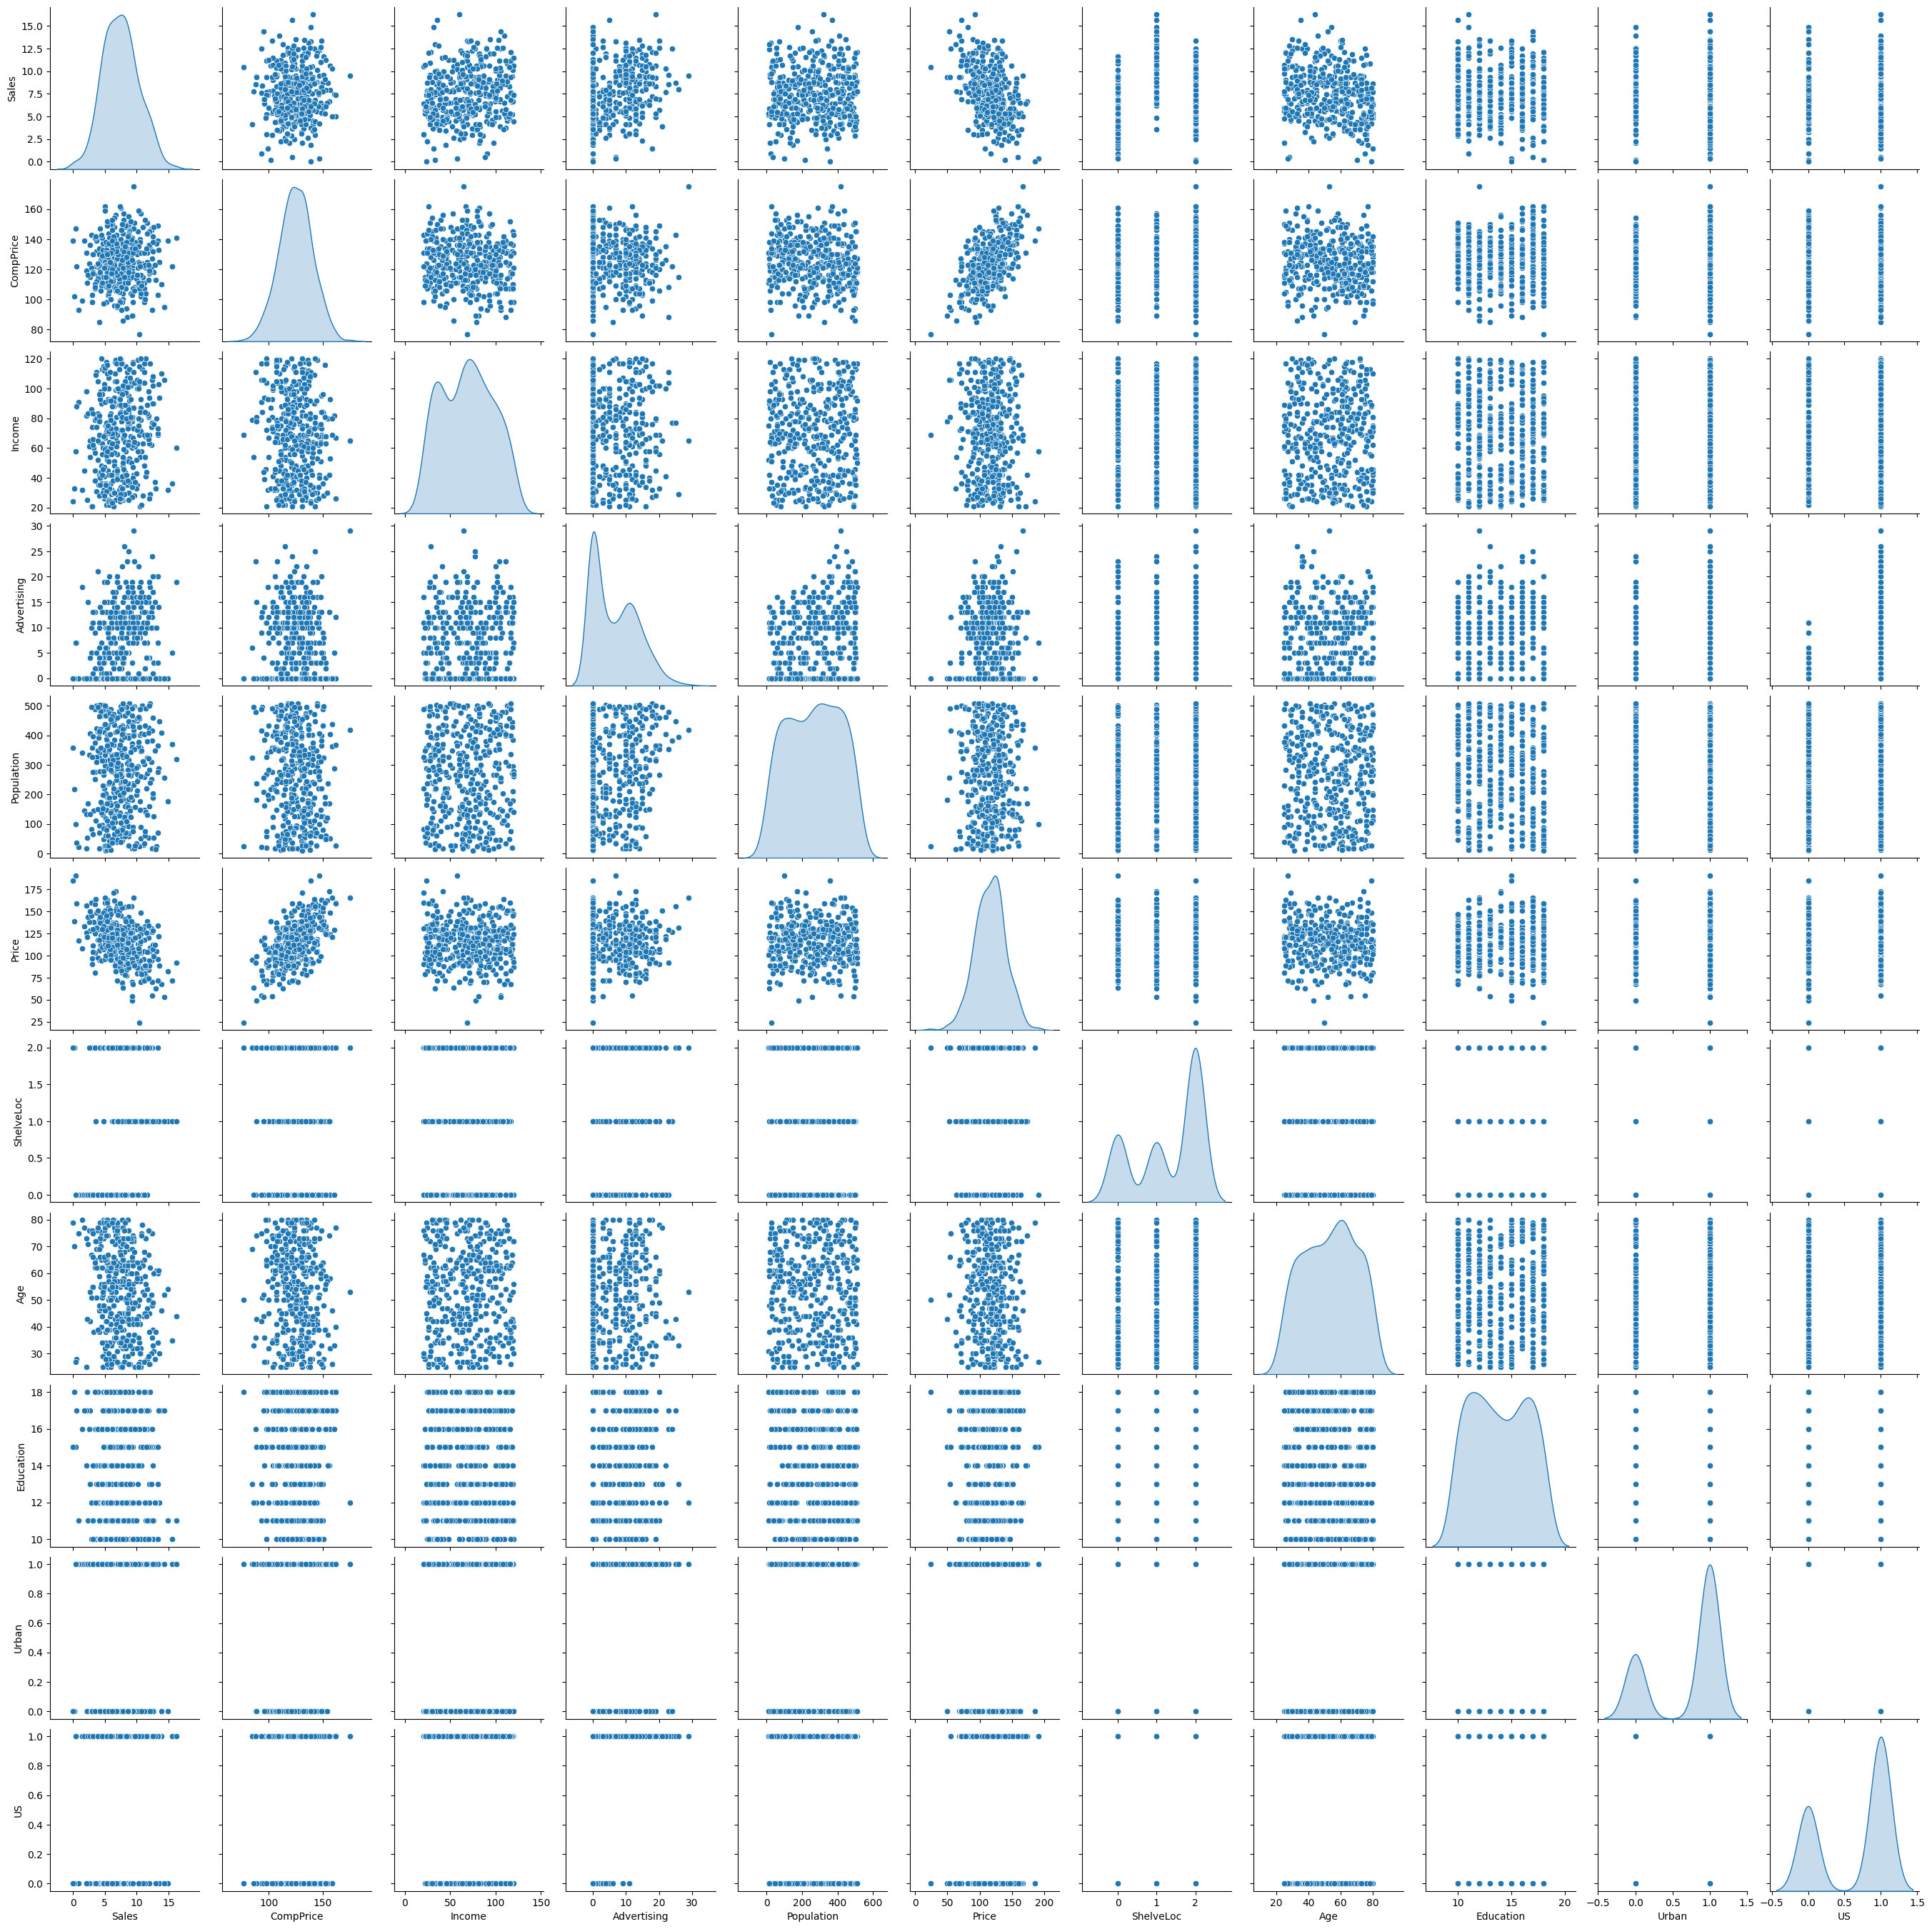

In [ ]:
# Pair potting
sns.pairplot(com, diag_kind='kde')

<Axes: xlabel='Sales', ylabel='Income'>

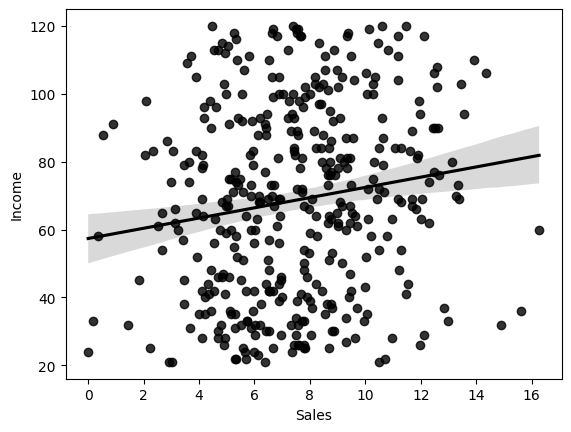

In [ ]:
# Regression Plot
sns.regplot(x='Sales', y='Income', data=com, color='black')


<Axes: >

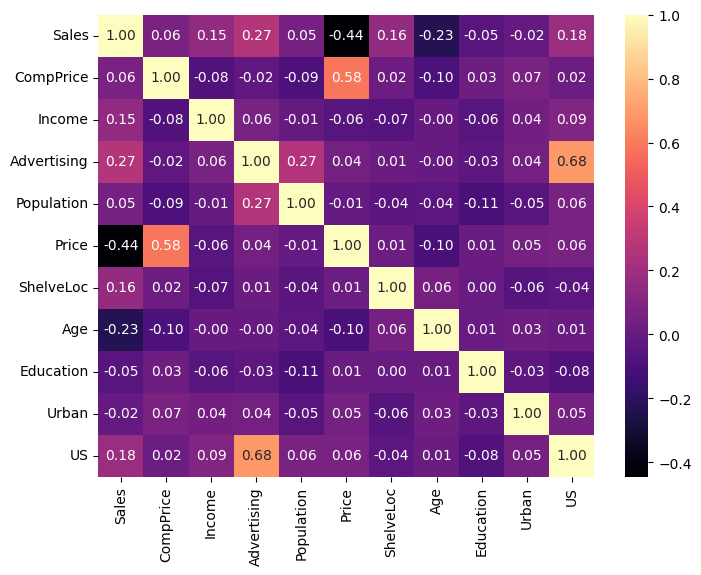

In [ ]:
plt.figure(figsize = (8, 6));
sns.heatmap(com.corr(), cmap='magma', annot=True, fmt=".2f")


<Axes: >

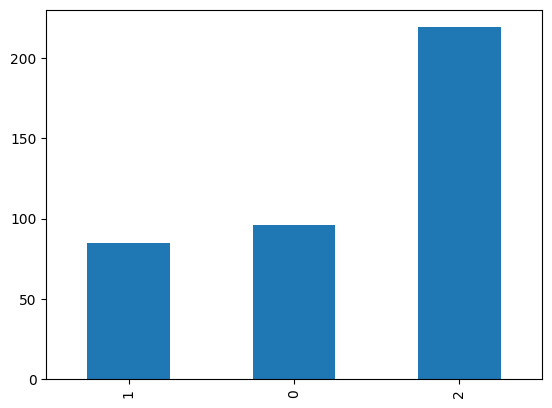

In [ ]:
com.ShelveLoc.value_counts(ascending=True).plot(kind='bar')


In [ ]:
x=com.drop(['Sales'], axis=1)
y=com[['Sales']]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [ ]:
y.tail()

,Sales
395,12.57
396,6.14
397,7.41
398,5.94
399,9.71


Random Forest Regression

In [ ]:
num_trees = 70
max_features = 5


In [ ]:
kfold = KFold(n_splits=7, random_state=34, shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)

In [ ]:
results = cross_val_score(model, x, y, cv=kfold)
print("The accuracy is ",results.mean())

The accuracy is  0.6679308740676991


**explore the bagging and boosting method.**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Define the bin edges and labels
bin_edges = [0, 7, 11, 25]
bin_labels = ['low', 'normal', 'good']

# Use the cut function to convert numerical data to categorical
com['Sales_new'] = pd.cut(com['Sales'], bins=bin_edges, labels=bin_labels, right=False)


In [ ]:
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_new
0,9.50,138,73,11,276,120,0,42,17,1,1,normal
1,11.22,111,48,16,260,83,1,65,10,1,1,good
2,10.06,113,35,10,269,80,2,59,12,1,1,normal
3,7.40,117,100,4,466,97,2,55,14,1,1,normal
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,good
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,normal
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier


In [ ]:
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_new
0,9.50,138,73,11,276,120,0,42,17,1,1,normal
1,11.22,111,48,16,260,83,1,65,10,1,1,good
2,10.06,113,35,10,269,80,2,59,12,1,1,normal
3,7.40,117,100,4,466,97,2,55,14,1,1,normal
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,good
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,normal
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')  # drop the first category to avoid multicollinearity
encoded_features = encoder.fit_transform(com[['Sales_new']])
df_encoded = pd.concat([com.drop(['Sales_new'], axis=1), pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sales_new']))], axis=1)

# Display the DataFrame after one-hot encoding
print("DataFrame after one-hot encoding:")
print(df_encoded)



DataFrame after one-hot encoding:
     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   

In [ ]:
com.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_new'],
      dtype='object')

In [ ]:
com = com.drop('Sales', axis=1)


In [ ]:
x1=com.drop(['Sales_new'], axis=1)
y1=com[['Sales_new']]
x1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']], com['Sales_new'], test_size=0.2, random_state=42)


In [ ]:
com

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_new
0,138,73,11,276,120,0,42,17,1,1,normal
1,111,48,16,260,83,1,65,10,1,1,good
2,113,35,10,269,80,2,59,12,1,1,normal
3,117,100,4,466,97,2,55,14,1,1,normal
4,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,good
396,139,23,3,37,120,2,55,11,0,1,low
397,162,26,12,368,159,2,40,18,1,1,normal
398,100,79,7,284,95,0,50,12,1,1,low


In [ ]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117,100,4,466,97,2,55,14,1,1
18,110,110,0,408,68,1,46,17,0,1
202,121,78,4,413,130,0,46,10,0,1
250,137,105,10,435,156,1,72,14,1,1
274,135,93,2,67,119,2,34,11,1,1
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,2,58,17,0,1
106,102,33,0,217,139,2,70,18,0,0
270,119,26,0,284,89,1,26,10,1,0
348,132,102,20,459,107,1,49,11,1,1


In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score


**Bagging with Random Forest**

In [ ]:
# Bagging with Random Forest
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging with Random Forest Accuracy: {bagging_accuracy:.4f}")


Bagging with Random Forest Accuracy: 0.6125


**Boosting with AdaBoost**


In [ ]:
# Boosting with AdaBoost
adaboost_classifier = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                         n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"Boosting with Random Forest (AdaBoost) Accuracy: {adaboost_accuracy:.4f}")


Boosting with Random Forest (AdaBoost) Accuracy: 0.6250
